In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from joblib import dump, load

#### Чтение данных

In [8]:
data = pd.read_csv('data/data_new.csv')

In [14]:
data[data['state'] == 'statement'].drop_duplicates(subset=['data_time'])

,data_time,values_speed,values_state_speed,values_frequency,values_state_frequency,values_vibration,values_state_vibration,values_left_bak,values_state_left_bak,values_right_bak,values_state_right_bak,state,state_boat
1,14.04.2022 15:05,0.0,норма,0.00000,норма,0.000000,норма,0.0000,норма,0.0000,норма,statement,норма
2,14.04.2022 17:46,0.0,норма,14252.33551,аварийно высокое,24.333776,норма,5737.9718,аварийно высокое,5746.5533,аварийно высокое,statement,аварийно высокое
52,14.04.2022 18:06,0.0,норма,0.00000,норма,7.275801,норма,0.0000,норма,0.0000,норма,statement,норма
53,14.04.2022 18:26,0.0,норма,0.00000,норма,7.281779,норма,0.0000,норма,0.0000,норма,statement,норма
54,14.04.2022 18:46,0.0,норма,0.00000,норма,7.292082,норма,0.0000,норма,0.0000,норма,statement,норма
...,...,...,...,...,...,...,...,...,...,...,...,...,...
330636,16.04.2022 07:00,0.0,норма,0.00000,норма,0.000000,норма,5747.6744,аварийно высокое,5757.4742,аварийно высокое,statement,аварийно высокое
330637,16.04.2022 07:01,0.0,норма,0.00000,норма,0.000000,норма,5747.6744,аварийно высокое,5757.4762,аварийно высокое,statement,аварийно высокое
330638,16.04.2022 07:02,0.0,норма,0.00000,норма,0.000000,норма,5747.6744,аварийно высокое,5757.4782,аварийно высокое,statement,аварийно высокое
330643,16.04.2022 07:03,0.0,норма,0.00000,норма,0.000000,норма,5747.6784,аварийно высокое,5757.4802,аварийно высокое,statement,аварийно высокое


In [13]:
data[data['state'] == 'movement'].drop_duplicates(subset=['data_time'])

,data_time,values_speed,values_state_speed,values_frequency,values_state_frequency,values_vibration,values_state_vibration,values_left_bak,values_state_left_bak,values_right_bak,values_state_right_bak,state,state_boat
0,14.04.2022 14:45,0.4,норма,0.00000,норма,0.000000,норма,0.0000,норма,0.0000,норма,movement,норма
112,15.04.2022 10:07,6.6,норма,12530.55267,аварийно высокое,25.901055,норма,5740.0290,аварийно высокое,5748.7325,аварийно высокое,movement,аварийно высокое
362,15.04.2022 10:27,5.4,норма,19601.35986,аварийно высокое,24.263496,норма,5743.2230,аварийно высокое,5751.3065,аварийно высокое,movement,аварийно высокое
612,15.04.2022 10:47,1.8,норма,21395.50964,аварийно высокое,25.330026,норма,5745.7930,аварийно высокое,5753.6425,аварийно высокое,movement,аварийно высокое
747,15.04.2022 14:07,2.8,норма,0.00000,норма,0.000000,норма,5747.5732,аварийно высокое,0.0000,норма,movement,аварийно высокое
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15018,04.06.2022 18:19,4.6,норма,0.00000,норма,0.000000,норма,6038.1461,аварийно высокое,5945.7491,аварийно высокое,movement,аварийно высокое
15027,04.06.2022 19:39,2.2,норма,0.00000,норма,0.000000,норма,6044.5761,аварийно высокое,5954.4031,аварийно высокое,movement,аварийно высокое
15036,08.06.2022 09:44,0.2,норма,0.00000,норма,0.000000,норма,6061.9735,аварийно высокое,5971.9982,аварийно высокое,movement,аварийно высокое
15045,14.06.2022 08:28,4.2,норма,0.00000,норма,0.000000,норма,6083.9671,аварийно высокое,5994.4041,аварийно высокое,movement,аварийно высокое


In [49]:
movement_state = data[data['state'] == 'movement']
statement_state = data[data['state'] == 'statement']

In [50]:
movement_state

,data_time,values_speed,values_state_speed,values_frequency,values_state_frequency,values_vibration,values_state_vibration,values_left_bak,values_state_left_bak,values_right_bak,values_state_right_bak,state,state_boat
0,14.04.2022 14:45,0.4,норма,0.00000,норма,0.000000,норма,0.000,норма,0.000,норма,movement,норма
112,15.04.2022 10:07,6.6,норма,12530.55267,аварийно высокое,25.901055,норма,57400.290,аварийно высокое,57487.325,аварийно высокое,movement,аварийно высокое
113,15.04.2022 10:07,6.6,норма,12530.55267,аварийно высокое,25.901055,норма,57400.290,аварийно высокое,57488.145,аварийно высокое,movement,аварийно высокое
114,15.04.2022 10:07,6.6,норма,12530.55267,аварийно высокое,25.901055,норма,57400.290,аварийно высокое,57487.885,аварийно высокое,movement,аварийно высокое
115,15.04.2022 10:07,6.6,норма,12530.55267,аварийно высокое,25.901055,норма,57400.290,аварийно высокое,57487.605,аварийно высокое,movement,аварийно высокое
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15065,22.06.2022 10:29,0.6,норма,0.00000,норма,0.000000,норма,61719.278,аварийно высокое,60827.148,аварийно высокое,movement,аварийно высокое
15066,22.06.2022 10:29,0.6,норма,0.00000,норма,0.000000,норма,61719.278,аварийно высокое,60826.988,аварийно высокое,movement,аварийно высокое
15067,22.06.2022 10:29,0.6,норма,0.00000,норма,0.000000,норма,61719.038,аварийно высокое,60827.348,аварийно высокое,movement,аварийно высокое
15068,22.06.2022 10:29,0.6,норма,0.00000,норма,0.000000,норма,61719.038,аварийно высокое,60827.148,аварийно высокое,movement,аварийно высокое


In [51]:
statement_state

,data_time,values_speed,values_state_speed,values_frequency,values_state_frequency,values_vibration,values_state_vibration,values_left_bak,values_state_left_bak,values_right_bak,values_state_right_bak,state,state_boat
1,14.04.2022 15:05,0.0,норма,0.00000,норма,0.000000,норма,0.000,норма,0.000,норма,statement,норма
2,14.04.2022 17:46,0.0,норма,14252.33551,аварийно высокое,24.333776,норма,57379.718,аварийно высокое,57465.533,аварийно высокое,statement,аварийно высокое
3,14.04.2022 17:46,0.0,норма,14252.33551,аварийно высокое,24.333776,норма,57379.658,аварийно высокое,57465.533,аварийно высокое,statement,аварийно высокое
4,14.04.2022 17:46,0.0,норма,14252.33551,аварийно высокое,24.333776,норма,57379.538,аварийно высокое,57465.533,аварийно высокое,statement,аварийно высокое
5,14.04.2022 17:46,0.0,норма,14252.33551,аварийно высокое,24.333776,норма,57379.458,аварийно высокое,57465.533,аварийно высокое,statement,аварийно высокое
...,...,...,...,...,...,...,...,...,...,...,...,...,...
330642,16.04.2022 07:02,0.0,норма,0.00000,норма,0.000000,норма,57476.764,аварийно высокое,57574.802,аварийно высокое,statement,аварийно высокое
330643,16.04.2022 07:03,0.0,норма,0.00000,норма,0.000000,норма,57476.784,аварийно высокое,57574.802,аварийно высокое,statement,аварийно высокое
330644,16.04.2022 07:10,0.0,норма,0.00000,норма,0.000000,норма,57476.784,аварийно высокое,57574.822,аварийно высокое,statement,аварийно высокое
330645,16.04.2022 07:10,0.0,норма,0.00000,норма,0.000000,норма,57476.824,аварийно высокое,57574.802,аварийно высокое,statement,аварийно высокое


#### Подготовка данных

In [52]:
def data_preprocessing(df):

    # категориальные переменные
    # их мы будем кодировать

    categories = {
        'values_state_speed',
        'values_state_frequency',
        'values_state_vibration',
        'values_state_left_bak',
        'values_state_right_bak'
    }

    # избавимся от ненужных столбцов

    features_to_drop = [
        'data_time',
        'state'
    ]

    df = df.drop(features_to_drop, axis=1)

    # кодируем категориальные переменные

    enc = LabelEncoder()
    
    for cat in categories:
        df[cat] = enc.fit_transform(df[cat].values)

    return df

In [53]:
movement_state = data_preprocessing(movement_state)

In [54]:
movement_state

,values_speed,values_state_speed,values_frequency,values_state_frequency,values_vibration,values_state_vibration,values_left_bak,values_state_left_bak,values_right_bak,values_state_right_bak,state_boat
0,0.4,0,0.00000,1,0.000000,0,0.000,1,0.000,1,норма
112,6.6,0,12530.55267,0,25.901055,0,57400.290,0,57487.325,0,аварийно высокое
113,6.6,0,12530.55267,0,25.901055,0,57400.290,0,57488.145,0,аварийно высокое
114,6.6,0,12530.55267,0,25.901055,0,57400.290,0,57487.885,0,аварийно высокое
115,6.6,0,12530.55267,0,25.901055,0,57400.290,0,57487.605,0,аварийно высокое
...,...,...,...,...,...,...,...,...,...,...,...
15065,0.6,0,0.00000,1,0.000000,0,61719.278,0,60827.148,0,аварийно высокое
15066,0.6,0,0.00000,1,0.000000,0,61719.278,0,60826.988,0,аварийно высокое
15067,0.6,0,0.00000,1,0.000000,0,61719.038,0,60827.348,0,аварийно высокое
15068,0.6,0,0.00000,1,0.000000,0,61719.038,0,60827.148,0,аварийно высокое


#### Тренировка модели для судов в движении

In [59]:
# кодируем таргет для модели
movement_state.replace({'state_boat': {'норма': 0, 'аварийно высокое': 1}}, inplace=True)
X = movement_state.drop('state_boat', axis=1)
y = movement_state['state_boat']

In [80]:
mov_state_model = DecisionTreeClassifier(criterion='gini',splitter='best', max_depth=6, random_state=2022)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.75, random_state=2022)

In [81]:
mov_state_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=2022)

[Text(0.6, 0.8333333333333334, 'X[6] <= 28700.145\nentropy = 0.062\nsamples = 3424\nvalue = [25, 3399]'),
 Text(0.4, 0.5, 'X[3] <= 0.5\nentropy = 0.709\nsamples = 31\nvalue = [25, 6]'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 3393\nvalue = [0, 3393]')]

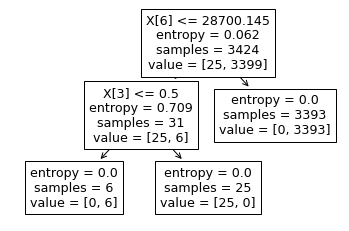

In [78]:
plot_tree(mov_state_model)

In [83]:
y_train_pred = mov_state_model.predict(X_train)
y_test_pred = mov_state_model.predict(X_test)
print('TEST\n\n' + classification_report(y_test, y_test_pred))
print('TRAIN\n\n' + classification_report(y_train, y_train_pred))

TEST

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00      1133

    accuracy                           1.00      1142
   macro avg       1.00      1.00      1.00      1142
weighted avg       1.00      1.00      1.00      1142

TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00      3399

    accuracy                           1.00      3424
   macro avg       1.00      1.00      1.00      3424
weighted avg       1.00      1.00      1.00      3424



In [101]:
dump(mov_state_model, 'models/mov_state_model.joblib')

['mov_state_model.joblib']

#### Тренировка модели для стоячих судов

In [85]:
statement_state = data_preprocessing(statement_state)

In [86]:
# кодируем таргет для модели
statement_state.replace({'state_boat': {'норма': 0, 'аварийно высокое': 1}}, inplace=True)
X = statement_state.drop('state_boat', axis=1)
y = statement_state['state_boat']

In [94]:
stat_state_model = DecisionTreeClassifier(criterion='entropy',splitter='best', max_depth=6, random_state=2022)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.75, random_state=2022)

In [96]:
stat_state_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=2022)

[Text(0.4, 0.875, 'X[7] <= 0.5\nentropy = 0.242\nsamples = 244560\nvalue = [9757, 234803]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 232157\nvalue = [0, 232157]'),
 Text(0.6, 0.625, 'X[2] <= 10086.861\nentropy = 0.748\nsamples = 12403\nvalue = [9757, 2646]'),
 Text(0.4, 0.375, 'X[8] <= 28733.689\nentropy = 0.024\nsamples = 9780\nvalue = [9757, 23]'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 9757\nvalue = [9757, 0]'),
 Text(0.6, 0.125, 'entropy = 0.0\nsamples = 23\nvalue = [0, 23]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 2623\nvalue = [0, 2623]')]

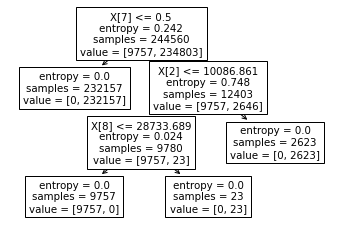

In [99]:
plot_tree(stat_state_model)

In [98]:
y_train_pred = stat_state_model.predict(X_train)
y_test_pred = stat_state_model.predict(X_test)
print('TEST\n\n' + classification_report(y_test, y_test_pred))
print('TRAIN\n\n' + classification_report(y_train, y_train_pred))

TEST

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3253
           1       1.00      1.00      1.00     78268

    accuracy                           1.00     81521
   macro avg       1.00      1.00      1.00     81521
weighted avg       1.00      1.00      1.00     81521

TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9757
           1       1.00      1.00      1.00    234803

    accuracy                           1.00    244560
   macro avg       1.00      1.00      1.00    244560
weighted avg       1.00      1.00      1.00    244560



In [102]:
dump(stat_state_model, 'models/stat_state_model.joblib')

['stat_state_model.joblib']